# Browse TD-MPC2 Runs

Interactive notebook for monitoring training progress and visualizing runs.

**Note:** Most text-based reports are now available via the CLI:
```bash
python -m discover status    # Training progress overview
python -m discover running   # Currently running tasks
python -m discover tasks     # All tasks with progress
python -m discover restart   # Show restart commands
```

This notebook focuses on **visualizations** and CLI output logging.

## Setup

In [1]:
from pathlib import Path
import sys

# Ensure repo root is importable
ROOT = Path('..').resolve()
if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))

# Import the discover API (config is centralized)
from discover import load_df, get_target_step, get_logs_dir, get_wandb_project

TARGET_STEP = get_target_step()
print(f"ROOT: {ROOT}")
print(f"LOGS_DIR: {get_logs_dir()}")
print(f"WANDB_PROJECT: {get_wandb_project()}")
print(f"TARGET_STEP: {TARGET_STEP:,}")

ROOT: /home/projects/dharel/nadavt/repos/newt/tdmpc2
LOGS_DIR: /home/projects/dharel/nadavt/repos/newt/tdmpc2/logs
WANDB_PROJECT: wm-planning/mmbench
TARGET_STEP: 5,000,000


## Load Runs Data

In [2]:
# Load data from cache (set refresh=True to force re-fetch from local/wandb)
# Tip: Use `python -m discover refresh` from terminal to refresh cache
df_all = load_df(refresh=False)

print(f"Loaded {len(df_all)} runs")
df_all.head()

Loaded 3290 runs


,task,local_run_id,exp_name,status,ckpt_step,steps,updated_at,wandb_run_id,run_dir,ckpt_path,found_in,url,summary
0,ms-pick-can,20251216_004843_expert_ms-pick-can,expert_ms-pick-can,running,0.0,5000000.0,2025-12-16T02:48:43.871188,None,/home/projects/dharel/nadavt/repos/newt/tdmpc2...,None,local,nan,None
1,og-ant-maze,20251216_004844_expert_og-ant-maze,expert_og-ant-maze,running,0.0,5000000.0,2025-12-16T02:48:44.222972,None,/home/projects/dharel/nadavt/repos/newt/tdmpc2...,None,local,nan,None
2,ms-pick-hammer,20251216_004845_expert_ms-pick-hammer,expert_ms-pick-hammer,running,0.0,5000000.0,2025-12-16T02:48:45.409009,None,/home/projects/dharel/nadavt/repos/newt/tdmpc2...,None,local,nan,None
3,atari-jamesbond,20251216_004858_expert_atari-jamesbond,expert_atari-jamesbond,running,0.0,5000000.0,2025-12-16T02:48:58.980682,None,/home/projects/dharel/nadavt/repos/newt/tdmpc2...,None,local,nan,None
4,atari-ms-pacman,20251216_004858_expert_atari-ms-pacman,expert_atari-ms-pacman,running,0.0,5000000.0,2025-12-16T02:48:58.648084,None,/home/projects/dharel/nadavt/repos/newt/tdmpc2...,None,local,nan,None


## Training Progress Overview

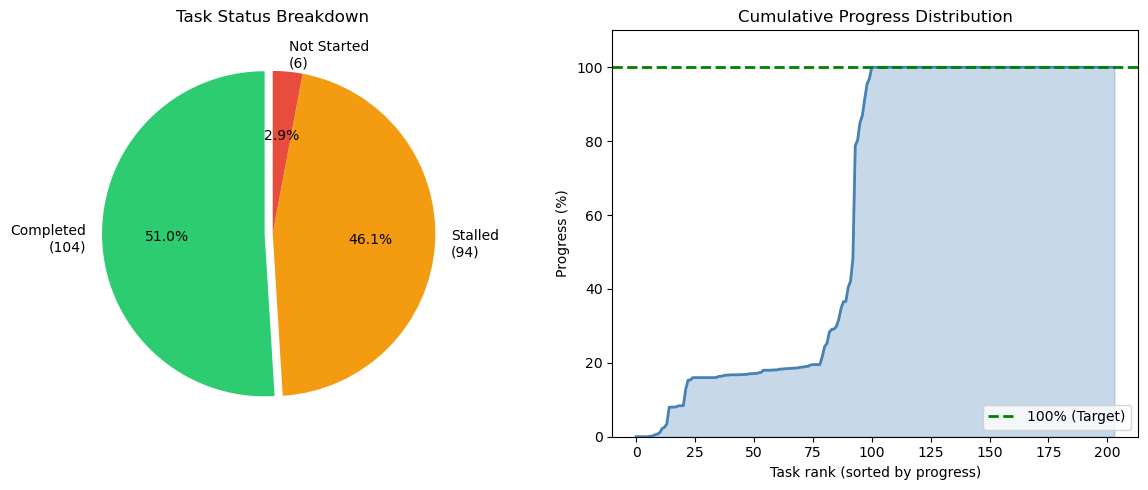

                 TRAINING PROGRESS SUMMARY                  
  Total tasks:            204
  Target step:         5,000,000
------------------------------------------------------------
  🟢 ✅ Completed:         104 (51.0%)
  🔵 🏃 Running:             0 (0.0%)  <- active in wandb
  🟠 ⏸️  Stalled:            94 (46.1%)  <- needs restart
  🔴 ❌ Not Started:         6 (2.9%)
------------------------------------------------------------
  Average progress:      61.5%
  Median progress:      100.0%
  Min steps:                0
  Max steps:           5,000,000


In [3]:
from discover.plots import training_overview

training_overview(df_all, target_step=TARGET_STEP)

## Currently Running / Needs Restart (CLI)


In [4]:
%cd {ROOT}
!python -m discover running

/home/projects/dharel/nadavt/repos/newt/tdmpc2


/home/projects/dharel/nadavt/.conda/envs/newt/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


                         RUNNING RUNS SUMMARY                         
  Running runs (wandb):           1  ✓ confirmed by wandb
  Stale local 'running':        768  ⚠️  (local-only, likely crashed)
  Tasks with running runs:        1
  Tasks needing restart:        100  ⚠️  (incomplete, no active run)
  Tasks with stale runs:          0  🔄 (>1 wandb run, from resume)

🏃 CURRENTLY RUNNING TASKS (1 tasks, 1 runs per wandb):
   Note: wandb 'running' may include LSF-suspended jobs (SSUSP)
----------------------------------------------------------------------
Task                                       Runs     Progress     Max Step
----------------------------------------------------------------------
   ms-pick-mug                                1      100.0%    5,000,000
----------------------------------------------------------------------


In [5]:
# Restart Commands - shows bsub commands for stalled tasks (add --submit to run)
!python -m discover restart

                         RUNNING RUNS SUMMARY                         
  Running runs (wandb):           1  ✓ confirmed by wandb
  Stale local 'running':        768  ⚠️  (local-only, likely crashed)
  Tasks with running runs:        1
  Tasks needing restart:        100  ⚠️  (incomplete, no active run)
  Tasks with stale runs:          0  🔄 (>1 wandb run, from resume)

⚠️  TASKS NEEDING RESTART (100 tasks, no active runs in wandb):
----------------------------------------------------------------------
Task                                         Progress        Max Step
----------------------------------------------------------------------
   atari-yars-revenge                          97.0%       4,848,000
   atari-upndown                               95.4%       4,772,000
   ms-pick-orange                              91.4%       4,568,100
   ms-place-sphere                             86.9%       4,345,650
   ms-pick-cube-xarm6                          85.0%       4,250,950
   ms-p

## Per-Task Progress Visualization


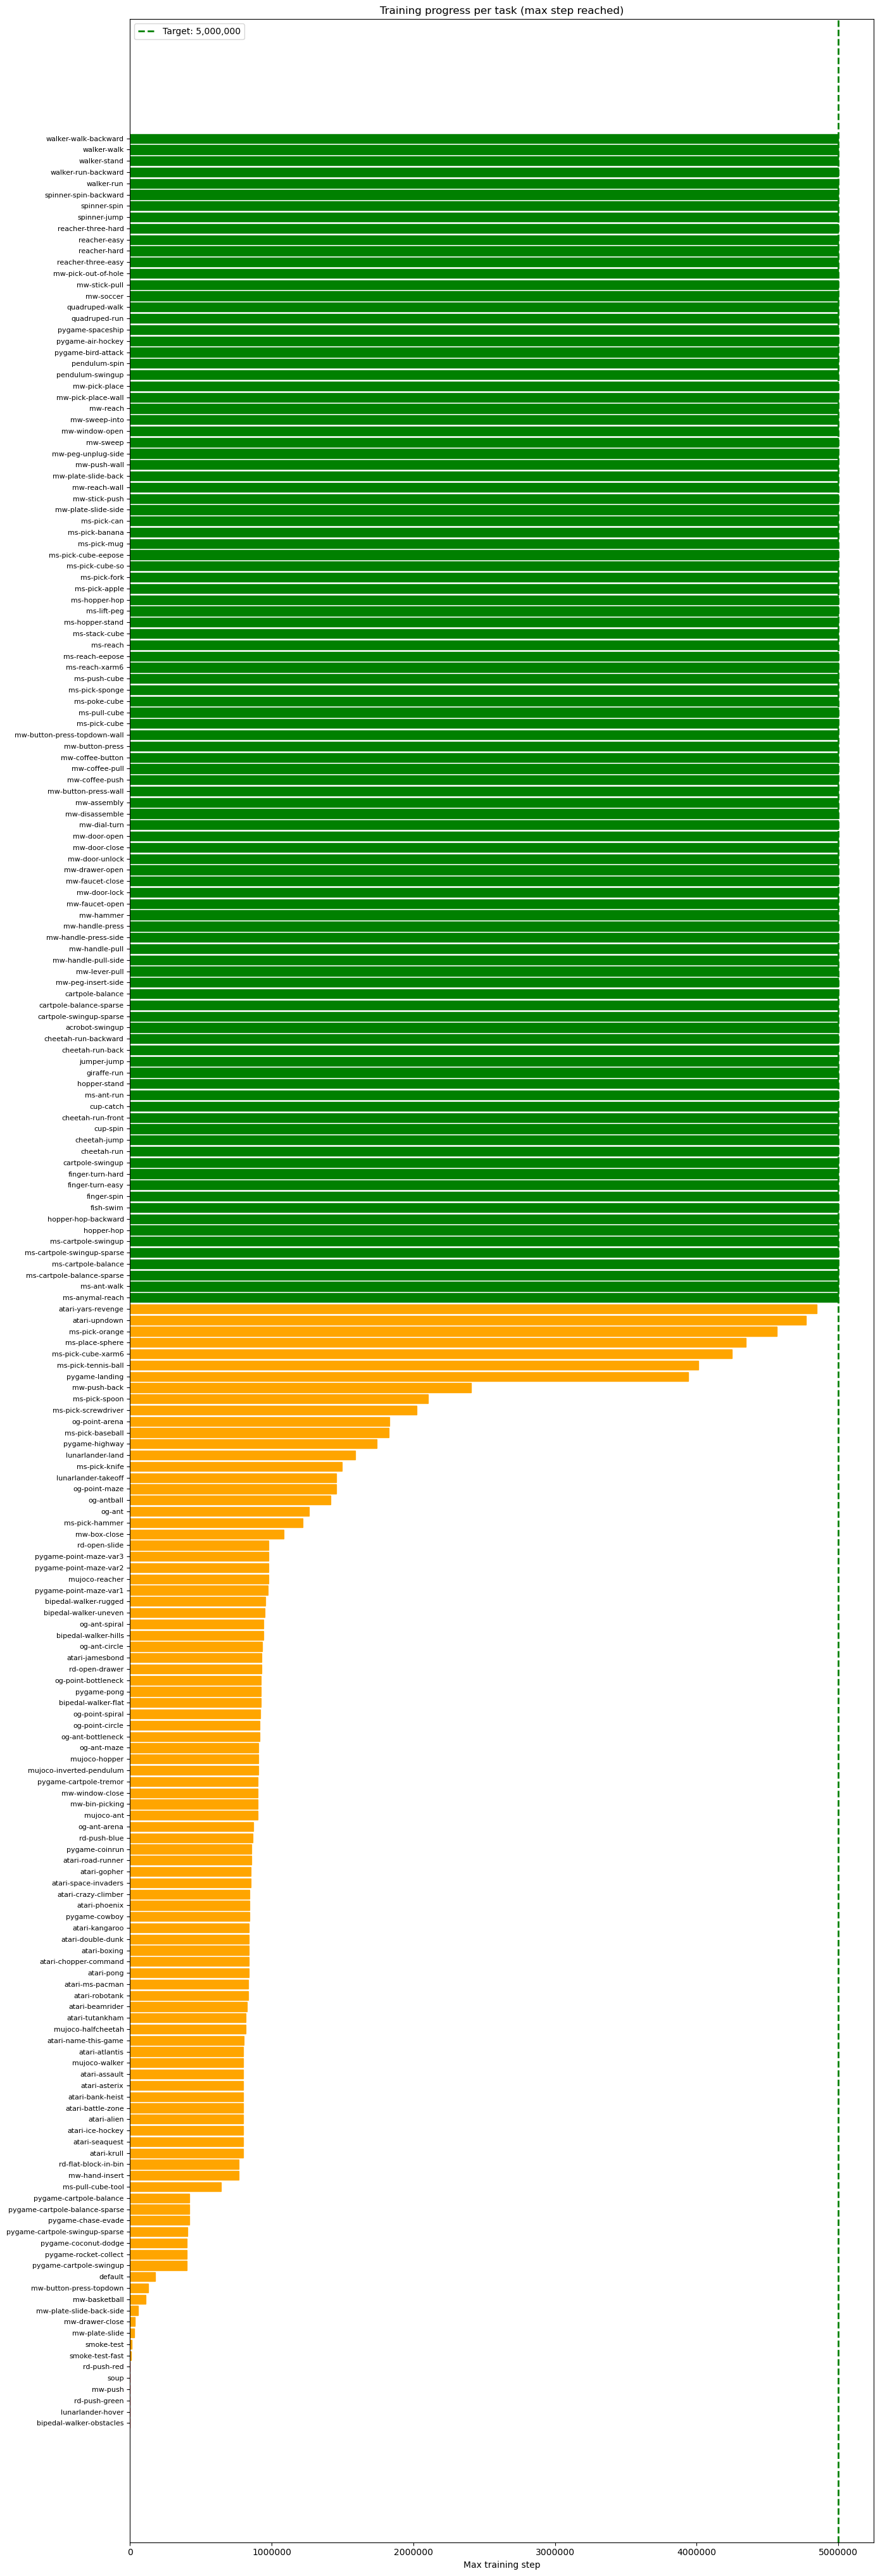

In [6]:
from discover.plots import plot_max_steps

# Green = completed, Orange = in progress, Red = not started
plot_max_steps(df_all, target_step=TARGET_STEP)


## All Tasks (CLI)

In [7]:
!python -m discover tasks

                                   ALL TASKS                                    
Task                                            Progress     Max Step   Runs   Status
--------------------------------------------------------------------------------
   bipedal-walker-obstacles                        0.0%            0      0        🔴
   lunarlander-hover                               0.0%            0      0        🔴
   mw-push                                         0.0%            0      0        🔴
   rd-push-green                                   0.0%            0      0        🔴
   rd-push-red                                     0.0%            0      0        🔴
   soup                                            0.0%            0      0        🔴
   smoke-test                                      0.2%       10,000      0        🟠
   smoke-test-fast                                 0.2%        8,000      0        🟠
   mw-plate-slide                                  0.6%       27,600    

## Progress by Domain (CLI + Visualization)

In [8]:
!python -m discover domains

                               PROGRESS BY DOMAIN                               
Domain                  Tasks   Complete   Avg Progress   Completion %
--------------------------------------------------------------------------------
acrobot                     1          1         100.0%         100.0%
cartpole                    4          4         100.0%         100.0%
giraffe                     1          1         100.0%         100.0%
cheetah                     5          5         100.0%         100.0%
cup                         2          2         100.0%         100.0%
finger                      3          3         100.0%         100.0%
fish                        1          1         100.0%         100.0%
pendulum                    2          2         100.0%         100.0%
jumper                      1          1         100.0%         100.0%
hopper                      3          3         100.0%         100.0%
walker                      5          5         100.0%  

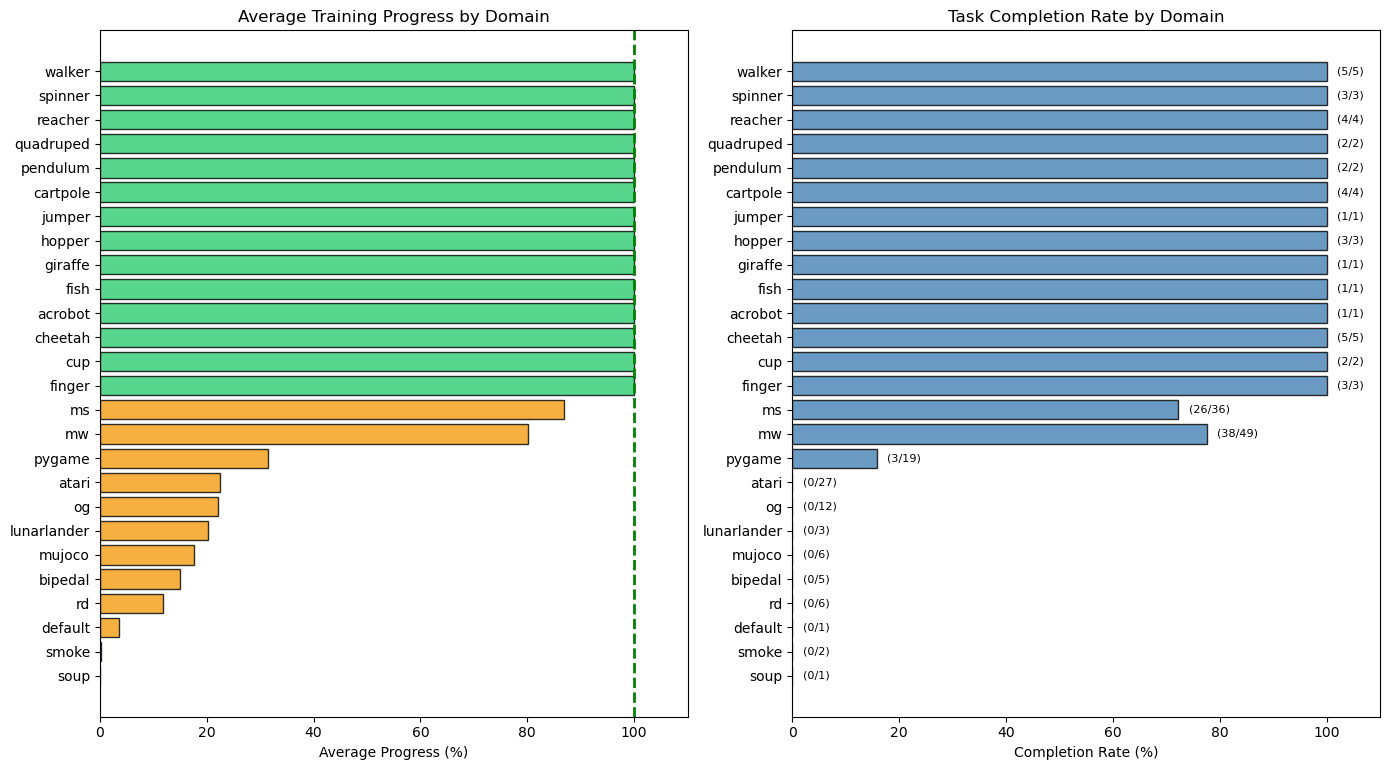


Domain Summary:
--------------------------------------------------------------------------------
Domain                  Tasks   Complete   Avg Progress   Completion %
--------------------------------------------------------------------------------
reacher                     4          4         100.0%         100.0%
quadruped                   2          2         100.0%         100.0%
hopper                      3          3         100.0%         100.0%
jumper                      1          1         100.0%         100.0%
giraffe                     1          1         100.0%         100.0%
fish                        1          1         100.0%         100.0%
cheetah                     5          5         100.0%         100.0%
acrobot                     1          1         100.0%         100.0%
finger                      3          3         100.0%         100.0%
cup                         2          2         100.0%         100.0%
spinner                     3          3

In [9]:
from discover.plots import progress_by_domain

progress_by_domain(df_all, target_step=TARGET_STEP)

## Evaluation Status (CLI)

In [ ]:
!python -m discover eval list

## Collect Videos (CLI)

In [ ]:
!python -m discover videos collect